# <font color='red'> Project 2 
 

#  Regression

# About the Data

Date: time (yr:mon:day:hr:min:sec)       Appliances: energy use in Wh     lights: Energy use of light fixtures in the house(Wh)  
T1: Temperature in kitchen area(C)                                          RH_1: Humidity in kitchen area(%)      
T2: Temperature in living room area(C)                                      RH_2: Humidity in living room(%)         
T3: Temperature in laundry room                                             RH_3: Humidity in laundry room area(%)             
T4: Temperature in office room(C)                                           RH_4: Humidity in office room(%)       
T5: Temperature in bathroom in (C)                                          RH_5: Humidity in bathroom(%)                    
T6: Temperature outside the building (north side) in (C)                    RH_6: Humidity outside the building (northside)%    
T7: Temperature in ironing room in (C)                                      RH_7: Humidity in ironing room in (%)    
T8:Temperature in teenager room 2 in (C)                                    RH_8: Humidity in teenager room 2 in (%) 

T9: Temperature in parents room in (C)                                      RH_9: Humidity in parents room in %

To: Temperature outside (from Chievres weather station) in (C)              Pressure (from Chievres weather station): in mm Hg
RH_out: Humidity outside (from Chievres weather station) in (%)             Wind speed (from Chievres weather station): in(m/s)
Visibility (from Chievres weather station): Ordinal data                    Tdewpoint (from Chievres weather station): Cat data
rv1: Random variable 1(nondimensional)                                      rav2: Random variable 2(nondimensional)

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

In [1]:
###Downloading all the library required for the project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mno #install running pip install missingno on cmd if using PYPI directly or conda install -c conda-forge missingno -if using anaconda)\
from sklearn.model_selection import GridSearchCV
from missingpy import KNNImputer # pip install missingpy on cmd 
import plotly.offline as py #Package for data visulization
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVR
from sklearn.decomposition import PCA


# Exploratory Data Analysis

In [2]:
#Import data into python
data = pd.read_csv(r'C:\Users\nayak\Downloads\ML Project1\RegressionKAG_energydata_data.csv', index_col= None)

In [3]:
data.head()

Date  Appliances  lights     T1       RH_1    T2     RH_2  \
0  1/11/2016 17:00          60    30.0  19.89  47.596667  19.2  44.7900   
1  1/11/2016 17:10          60    30.0  19.89  46.693333  19.2  44.7225   
2  1/11/2016 17:20          50    30.0  19.89  46.300000  19.2      NaN   
3  1/11/2016 17:30          50    40.0  19.89  46.066667  19.2  44.5900   
4  1/11/2016 17:40          60    40.0  19.89  46.333333  19.2  44.5300   

      T3       RH_3         T4    ...             T9   RH_9     T_out  \
0  19.79  44.730000  19.000000    ...      17.033333  45.53  6.600000   
1  19.79  44.790000  19.000000    ...      17.066667  45.56  6.483333   
2  19.79  44.933333  18.926667    ...      17.000000  45.50  6.366667   
3  19.79  45.000000  18.890000    ...      17.000000  45.40  6.250000   
4  19.79  45.000000  18.890000    ...      17.000000  45.40  6.133333   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0        733.5    92.0   7.000000           5        NDT  13.275433  13.275433  
1        733.6    92.0   6.666667           5        NDT  18.606195  18.606195  
2        733.7    92.0   6.333333           5        NDT  28.642668  28.642668  
3        733.8    92.0   6.000000           5        NDT  45.410390  45.410390  
4        733.9    92.0   5.666667           4        ADT  10.084097  10.084097  

[5 rows x 29 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
Date           19735 non-null object
Appliances     19735 non-null int64
lights         4483 non-null float64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19650 non-null float64
RH_2           19643 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19628 non-null float64
RH_6           19632 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 

In [5]:
#Function to convert categorical data to label encoding(We are not using Onehot encoders as the variable is ordinal)
def conditions(df):
    if (df['Tdewpoint']== 'LDT'):
        return 0
    elif (df['Tdewpoint']== 'ADT'):
        return 1
    elif (df['Tdewpoint']== 'NDT'):
        return 2
    else:
        return 3    

data['Tdewpoint']= data.apply(conditions, axis=1)

# Missing data visualization

In [6]:
pd.DataFrame(data.isna().sum(), columns=["records missing"]).T

Date  Appliances  lights  T1  RH_1  T2  RH_2  T3  RH_3  T4  \
records missing     0           0   15252   0     0  85    92   0     0   0   

                ...   T9  RH_9  T_out  Press_mm_hg  RH_out  Windspeed  \
records missing ...    0     0      0            0       0          0   

                 Visibility  Tdewpoint  rv1  rv2  
records missing           0          0    0    0  

[1 rows x 29 columns]

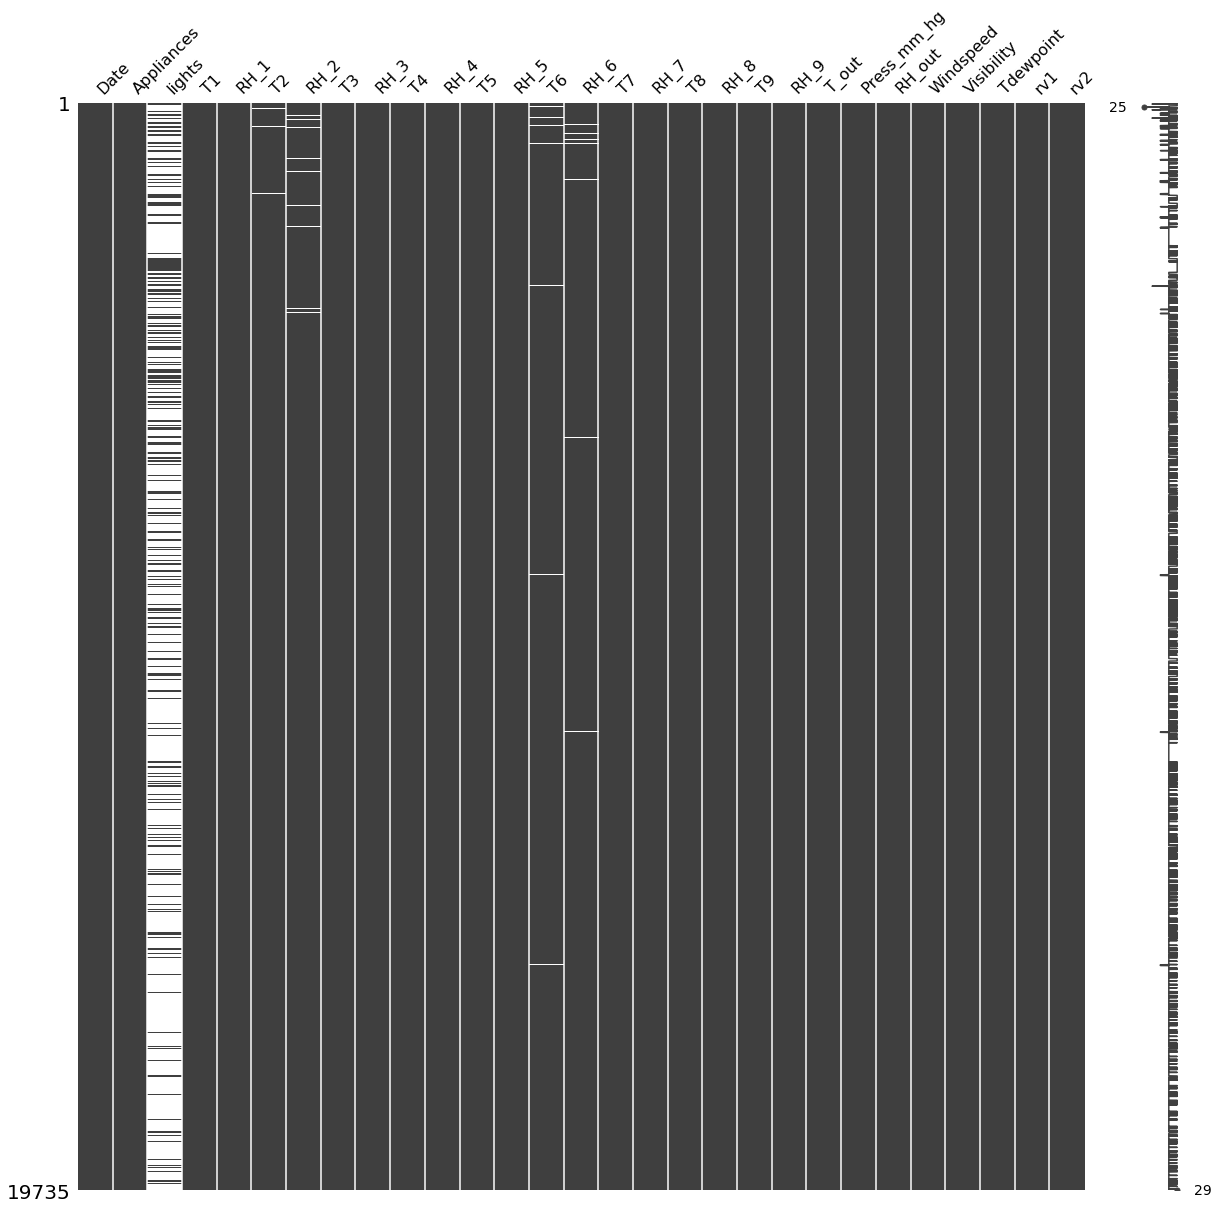

In [7]:
mno.matrix(data, figsize = (20, 20))

In [8]:
data= data.drop('lights', axis=1)

In [9]:
data= data.drop('Date', axis=1)

Date dropping reason: As we are not trying to analyze the problem as Time Series rather regress on "Appliance" column.

Lights dropping reason: As we have a lot of missing value in this column it would be better to get rid of the column rather than imputing values in it.

# Imputation using Missingpy package!!

In [10]:
imputer = KNNImputer(missing_values="NaN", n_neighbors=5, weights="uniform",
                     metric="masked_euclidean",)
data_new = imputer.fit_transform(data)

In [11]:
data_new= pd.DataFrame(data_new)
data_new.columns= data.columns

In [12]:
pd.DataFrame(data_new.isna().sum(), columns=["records missing"]).T

Appliances  T1  RH_1  T2  RH_2  T3  RH_3  T4  RH_4  T5 ...   \
records missing           0   0     0   0     0   0     0   0     0   0 ...    

                 T9  RH_9  T_out  Press_mm_hg  RH_out  Windspeed  Visibility  \
records missing   0     0      0            0       0          0           0   

                 Tdewpoint  rv1  rv2  
records missing          0    0    0  

[1 rows x 27 columns]

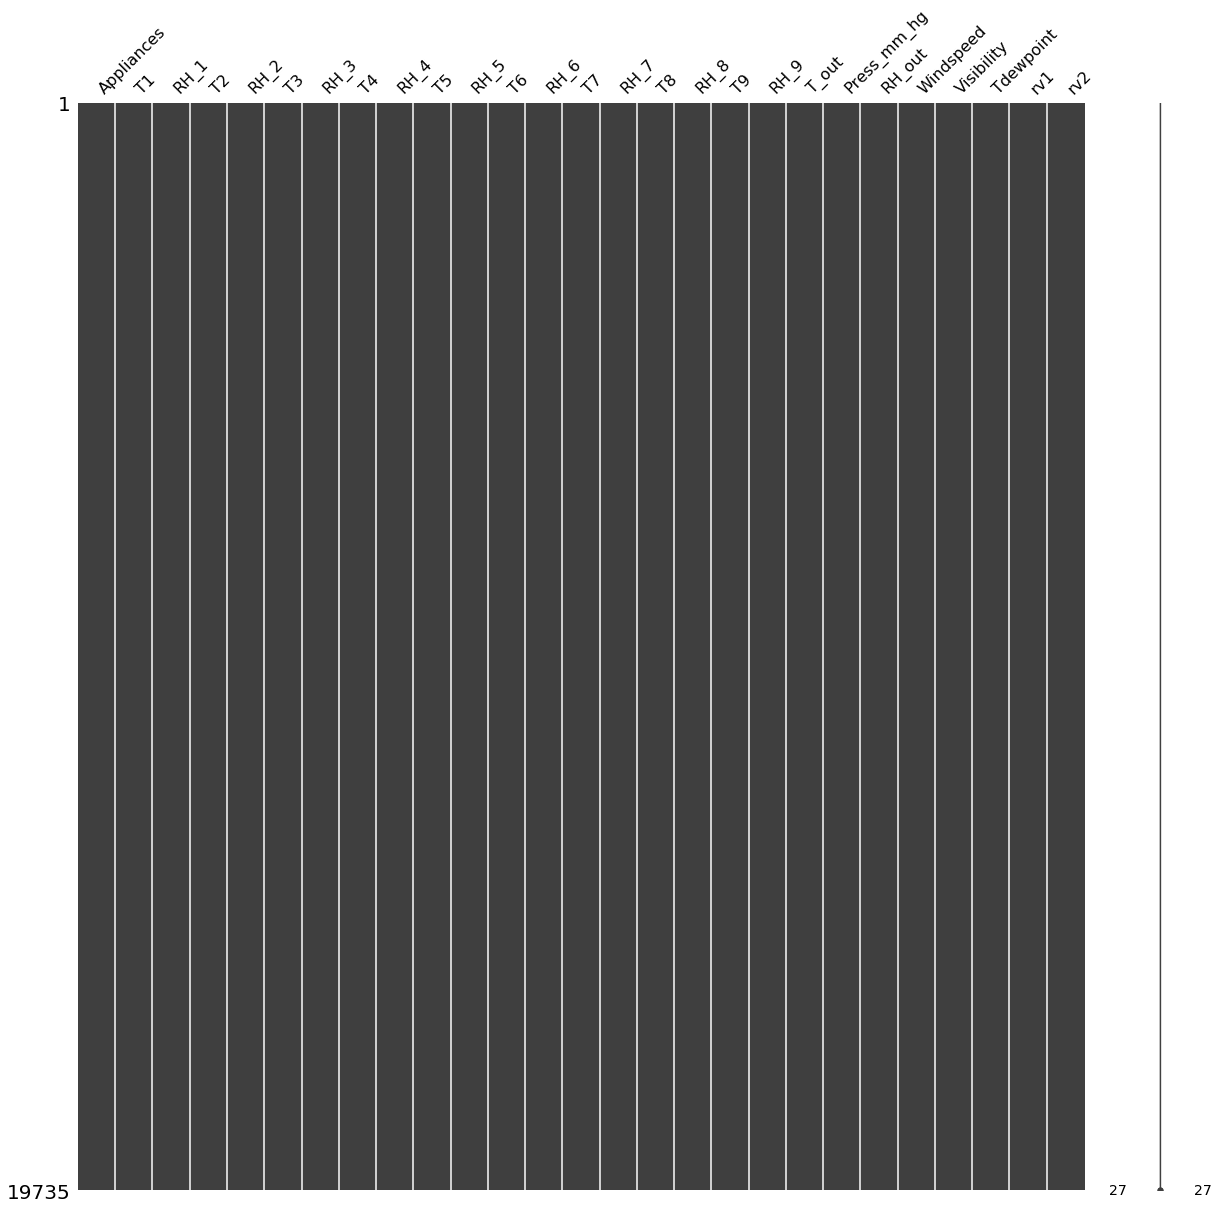

In [13]:
mno.matrix(data_new, figsize = (20, 20))

We can see all the missing data has been replaced with Imputed data!!

# Data Visualization

In [14]:
## Divide the columns based on type for clear column management 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [15]:
# Seperate dependent and independent variables 
feature_vars = data_new[col_temp + col_hum + col_weather + col_randoms] 
target_vars = data_new[col_target]

In [16]:
feature_vars.describe()

T1            T2            T3            T4            T5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.686571     20.340843     22.267611     20.855335     19.592106   
std        1.606066      2.192666      2.006111      2.042884      1.844623   
min       16.790000     16.100000     17.200000     15.100000     15.330000   
25%       20.760000     18.790000     20.790000     19.530000     18.277500   
50%       21.600000     20.000000     22.100000     20.666667     19.390000   
75%       22.600000     21.500000     23.290000     22.100000     20.619643   
max       26.260000     29.856667     29.236000     26.200000     25.795000   

                 T6            T7            T8            T9          RH_1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.913793     20.267106     22.029107     19.485828     40.259739   
std        6.087680      2.109993      1.956162      2.014712      3.979299   
min       -6.065000     15.390000     16.306667     14.890000     27.023333   
25%        3.626667     18.700000     20.790000     18.000000     37.333333   
50%        7.300000     20.033333     22.100000     19.390000     39.656667   
75%       11.256000     21.600000     23.390000     20.600000     43.066667   
max       28.290000     26.000000     27.230000     24.500000     63.360000   

           ...               RH_8          RH_9         T_out     Tdewpoint  \
count      ...       19735.000000  19735.000000  19735.000000  19735.000000   
mean       ...          42.936165     41.552401      7.411665      1.274284   
std        ...           5.224361      4.151497      5.317409      0.824842   
min        ...          29.600000     29.166667     -5.000000      0.000000   
25%        ...          39.066667     38.500000      3.666667      1.000000   
50%        ...          42.375000     40.900000      6.916667      1.000000   
75%        ...          46.536000     44.338095     10.408333      2.000000   
max        ...          58.780000     53.326667     26.100000      3.000000   

             RH_out   Press_mm_hg     Windspeed    Visibility           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418    755.522602      4.039752      3.444388     24.988033   
std       14.901088      7.399441      2.451221      1.088715     14.496634   
min       24.000000    729.300000      0.000000      0.000000      0.005322   
25%       70.333333    750.933333      2.000000      2.000000     12.497889   
50%       83.666667    756.100000      3.666667      4.000000     24.897653   
75%       91.666667    760.933333      5.500000      4.000000     37.583769   
max      100.000000    772.300000     14.000000      5.000000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 26 columns]

In [17]:
target_vars.describe()

Appliances
count  19735.000000
mean      97.694958
std      102.524891
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1080.000000

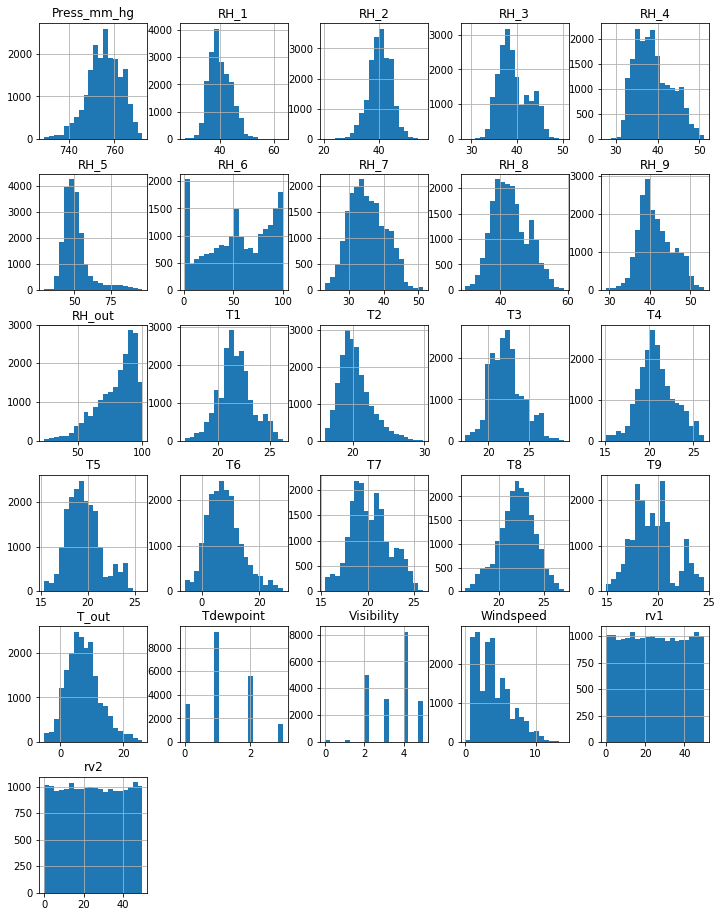

In [18]:
# Histogram of all the features to understand the distribution
feature_vars.hist(bins = 20 , figsize= (12,16)) ;

Focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution.

Using Plotly helps us visualize data better as it allows us to interact with the plot like zoom in to the distribution and hover around to locate the values corresponding to axis value

In [19]:
hist_data= [(feature_vars['RH_6']).values, (feature_vars['RH_out']).values]
group_labels= ['RH_6','RH_out']
fig= ff.create_distplot(hist_data, group_labels)
#py.plot(fig)
iplot(fig) #Prints the interactive plot in Jupyter notebook
hist_data1= [(feature_vars['Visibility']).values, (feature_vars['Windspeed']).values]
group_labels1= ['Visibility','Windspeed']
fig1= ff.create_distplot(hist_data1, group_labels1)
#py.plot(fig1)
iplot(fig1) #Prints the interactive plot in Jupyter notebook

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000221A32315C0>]],
      dtype=object)

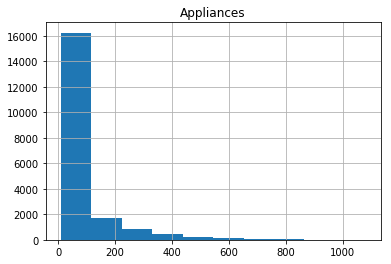

In [20]:
#Distribution of values in Applainces column
target_vars.hist()

# Observations:

1. Almost all Temperature variable follows "Normal Distribution".
2. Almost all Humidity variable follows "Normal Distribution" except RH_Out and RH_6, may be because they were placed outside      the house
3. RH_6 has a quite substatial values in bin[1-1.990] which could be rading from summer months(april/may) of data(Jan-June)
4. Windspeed column is postively skewed & RH_out is negatively skewed
5. RH_out, Windspeed & Visibility contains outliers
6. Appliance column is postively skewed with most of the values around mean 100 Wh

# Data Preprocessing 

 Data Scaling: Using Standard Scaler for scaling as some of the columns contains outliers and min_max are very sensitive to outiers

In [21]:
# I took a sbupart of the data for analysis as it was giving memory error and was very slow for such large dataset

x= feature_vars.iloc[:1200,:]
y= target_vars.iloc[:1200,:]

x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=0)

In [22]:
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)

In [23]:
#A data table for saving scores from all regressors
compiled= pd.DataFrame(columns= ['Regressor', 'Avg_Train_Score', 'Avg_Test_Score', 'RMSE_Best_Param', 'Best_Hyperparameters'])

# Model Implemented

We will be looking at following Algorithms

Bagging&Pasting:
1. Decision Tree
2. SVM Regressor

# Ada  Boost

1. Decision Tree
2. SVR

# Gradient Boosting

# PCA

1. Apply PCA on X_train
2. Apply all the models in project 1 again on data you get from PCA

# Model Evaluation Technique
K-fold Cross Validation: For following reason
1. As the data set in consideration is not small, computation time will be higher in LOOC.
2. Reduced Bias
3. Variance of resulting estimate can be reduced by increasing K value

# Model Evaluation Metrics
Used Train, Test score and RMSEvto find the best parameters for Grid_Search and then select the best model out of them.

...

# BAGGING

1. Using Decision Tree with the best hyperparameter recieved from first project

In [24]:
dt_rgs= DecisionTreeRegressor(max_depth=8, max_features=5, splitter= 'random')

dt_bag_rgs = BaggingRegressor(dt_rgs, n_estimators=500, max_samples=100, bootstrap=True, oob_score= bool, n_jobs=-1, random_state=0)

dt_bag_rgs.fit(x_train_scaled, (y_train.values).reshape(len(y_train),))
y_pred = dt_bag_rgs.predict(x_test_scaled)
y_pred

array([ 60.9905638 ,  97.3975429 , 125.6612581 ,  96.18253612,
        82.42381638,  90.6408326 ,  86.2594429 ,  71.8554232 ,
        73.77166896,  88.96052196, 183.27232121,  67.24960382,
       130.03092493, 193.52639577,  83.37278755, 176.99879265,
        76.17735734,  64.67988312, 117.1100447 ,  95.76037705,
        67.64086087,  76.10720145,  67.02680308,  74.70353761,
        73.71167344, 112.3733082 , 150.86564734,  60.90141902,
       149.67698084,  69.79507589, 113.6987256 , 131.55728296,
       145.3821359 ,  82.42654049, 132.40312759,  73.69984527,
        64.99645239,  66.37411514, 143.58964384, 128.16613989,
       117.12097156,  86.36586173, 149.96299943, 116.87703923,
        87.15130075, 128.48559846, 130.80832825, 110.83140109,
        66.17655801,  98.55326862,  92.43286099, 220.41505159,
        81.45737444, 167.82729928,  86.12679097,  79.90546932,
       117.25555279, 115.08081719, 178.43116047,  64.19812482,
       136.44640964, 182.98836195,  74.8837237 ,  81.29

In [25]:
print('Train score using Decision with Bagging: {:.2f}'.format(dt_bag_rgs.score(x_train_scaled, y_train)))
print('Test score using Decision with Bagging: {:.2f}'.format(dt_bag_rgs.score(x_test_scaled, y_test)))
print(f'Train score obtained using an out-of-bag estimate: {dt_bag_rgs.oob_score_}')

Train score using Decision with Bagging: 0.38
Test score using Decision with Bagging: 0.29
Train score obtained using an out-of-bag estimate: 0.25752553962308644


In [26]:
#Using Cross_validation to find train and test score
tree_final_train_scores=cross_val_score(dt_rgs,x_train_scaled, y_train, cv=10)
tree_final_test_scores=cross_val_score(dt_rgs,x_test_scaled, y_test, cv=10)
tree_final_train_scores.mean(),  tree_final_test_scores.mean() 

(0.043291488953737245, -0.8758873593714297)

We are getting negative score when using cross-validation as Model evaluation technique: which quite frankly doesnot make much sense, so in rest of the model we will be using simple train and test score for model evaluation

2. Using SVR with best hyperparameters we got from 1st project


In [27]:
svm_final= SVR(C=1 , gamma= 0.1 , kernel='poly')

svr_bag_rgs = BaggingRegressor(svm_final, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, oob_score= bool, random_state=0)

svr_bag_rgs.fit(x_train_scaled, (y_train.values).reshape(len(y_train),))
y_pred = svr_bag_rgs.predict(x_test_scaled)
y_pred

array([ 42.38762577,  57.92617458,  61.01888995,  53.63425393,
        60.54694967,  56.754044  ,  52.22391803,  55.24074828,
        48.97332982,  55.40532418,  66.77122832,  47.72435888,
        59.27015887,  58.12599766,  44.73113923,  71.82122878,
        51.64661792,  40.7810126 ,  56.7101115 ,  56.04082677,
        49.79332499,  55.70577559,  52.2430089 ,  51.27520723,
        55.46216417,  67.34570301,  94.02062695,  41.35748713,
       115.72180433,  44.05731884,  58.921587  ,  99.10652461,
        76.15515983,  60.25746532,  66.78116737,  48.47334492,
        42.77528055,  50.06386665,  61.32873548,  64.16357476,
        65.43753467,  52.4719671 ,  66.94126031,  64.74159181,
        57.75667491,  61.81933014,  59.52623743,  53.64572489,
        49.36596389,  62.13764946,  61.74349434,  79.53806079,
        48.56363906,  68.96575727,  55.5089849 ,  49.99749294,
        57.86895073,  61.30845662,  73.807586  ,  50.94890536,
       111.5193937 ,  71.17680667,  51.57240468,  56.70

In [28]:
print('Train score using Decision with Bagging: {:.2f}'.format(svr_bag_rgs.score(x_train_scaled, y_train)))
print('Test score using Decision with Bagging: {:.2f}'.format(svr_bag_rgs.score(x_test_scaled, y_test)))
print(f'Train score obtained using an out-of-bag estimate: {svr_bag_rgs.oob_score_}')

Train score using Decision with Bagging: -0.09
Test score using Decision with Bagging: -0.09
Train score obtained using an out-of-bag estimate: -0.09707048089627013


# Pasting

1. Using Decision Tree with the best hyperparameter recieved from first project


In [29]:
dt_rgs= DecisionTreeRegressor(max_depth=8, max_features=5, splitter= 'random')

dt_bag_rgs = BaggingRegressor(dt_rgs, n_estimators=500, max_samples=100, bootstrap= False, n_jobs=-1, random_state=0)

dt_bag_rgs.fit(x_train_scaled, (y_train.values).reshape(len(y_train),))
y_pred = dt_bag_rgs.predict(x_test_scaled)
y_pred

array([ 71.29040908, 101.01345746, 118.08568724,  98.84497609,
        70.98054352,  84.81288049,  89.11560936,  74.01710025,
        78.44240272,  80.68470537, 194.18204817,  63.55099159,
       153.05249172, 205.50060197,  91.23677124, 173.741509  ,
        84.54160976,  68.76532426, 109.67520931,  82.04894347,
        68.31773102,  77.72577892,  65.90335982,  74.1231984 ,
        74.61331127, 121.79047154, 164.7559702 ,  67.33603052,
       151.58453304,  78.12442235, 123.49444373, 136.15845599,
       154.96801184,  81.92164102, 140.60059937,  75.70705859,
        82.94458055,  63.53142374, 146.28797761, 127.65394368,
       130.05389066,  89.68419743, 140.67484384, 116.42252077,
        86.63462452, 134.88406905, 150.6246892 , 113.46680534,
        58.56791947, 105.16806581, 101.86383144, 237.21837005,
        93.36364299, 176.47991678,  95.69984938,  89.38526014,
       119.14812072, 115.69592682, 190.2031923 ,  69.13798074,
       138.17157192, 167.62111788,  69.93758133,  75.13

In [30]:
print('Train score using Decision with Bagging: {:.2f}'.format(dt_bag_rgs.score(x_train_scaled, y_train)))
print('Test score using Decision with Bagging: {:.2f}'.format(dt_bag_rgs.score(x_test_scaled, y_test)))

Train score using Decision with Bagging: 0.39
Test score using Decision with Bagging: 0.29


2. Using SVR with best hyperparameters we got from 1st project

In [31]:
svm_final= SVR(C=1 , gamma= 0.1 , kernel='poly')

svr_bag_rgs = BaggingRegressor(svm_final, n_estimators=500, max_samples=100, bootstrap= False, n_jobs=-1, random_state=0)

svr_bag_rgs.fit(x_train_scaled, (y_train.values).reshape(len(y_train),))
y_pred = svr_bag_rgs.predict(x_test_scaled)
y_pred

array([ 42.91344508,  57.69978559,  61.02763264,  53.43472952,
        60.07440591,  56.40735143,  51.97286255,  55.03098017,
        48.83480054,  54.9852263 ,  67.00422424,  47.55321263,
        59.12357938,  57.84061123,  44.31093041,  71.95464894,
        51.21007092,  41.28999355,  56.78437611,  55.63778455,
        49.17560102,  55.46268252,  51.97929921,  51.02364341,
        55.2282897 ,  67.22951473,  94.83003099,  41.94007768,
       113.35609174,  44.09093804,  58.63707423,  99.71212938,
        75.74398308,  59.8837754 ,  67.46287136,  48.70417349,
        43.35304549,  49.56904791,  61.20393517,  64.33409419,
        63.50756738,  52.2130946 ,  67.07822566,  64.30397284,
        57.9789722 ,  61.83497559,  59.39470242,  53.29065784,
        49.03214   ,  62.73185457,  62.23644875,  77.54468264,
        49.0912867 ,  68.46766731,  55.28455485,  50.21331476,
        57.65948548,  61.21563694,  74.37501893,  50.44882521,
       112.09889842,  71.54662783,  51.21149214,  56.37

In [32]:
print('Train score using Decision with Bagging: {:.2f}'.format(svr_bag_rgs.score(x_train_scaled, y_train)))
print('Test score using Decision with Bagging: {:.2f}'.format(svr_bag_rgs.score(x_test_scaled, y_test)))

Train score using Decision with Bagging: -0.09
Test score using Decision with Bagging: -0.09


Using GridSearch to find the best combination of Parameters

In [33]:

parameters = [{'max_samples':[ 10,40,60,80,100], 'n_estimators':[10,50,70,100,150,200]}]

svr_bag_rgs = GridSearchCV(estimator = BaggingRegressor(svm_final), param_grid = parameters, cv=5, n_jobs = -1)

svr_bag_rgs.fit(x_train_scaled,(y_train.values).reshape(len(y_train),))

GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingRegressor(base_estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'max_samples': [10, 40, 60, 80, 100], 'n_estimators': [10, 50, 70, 100, 150, 200]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
print('Train score using Decision with Bagging: {:.2f}'.format(svr_bag_rgs.score(x_train_scaled, y_train)))
print('Test score using Decision with Bagging: {:.2f}'.format(svr_bag_rgs.score(x_test_scaled, y_test)))

Train score using Decision with Bagging: -0.09
Test score using Decision with Bagging: -0.09


# Ada  Boost

1. Decision Tree
2. SVR

In [35]:
dt_rgs= DecisionTreeRegressor(max_depth=8, max_features=5, splitter= 'random')
ada_rgs = AdaBoostRegressor(dt_rgs, n_estimators=200, loss='linear', learning_rate=0.5, random_state=0)
ada_rgs.fit(x_train_scaled, (y_train.values).reshape(len(y_train),))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=5,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='random'),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [36]:
print('Train score using AdaBoost using Decision Tree as a base estimator: {:.2f}'.format(ada_rgs.score(x_train_scaled, y_train)))
print('Test score using AdaBoost using Decision Tree as a base estimator: {:.2f}'.format(ada_rgs.score(x_test_scaled, y_test)))

Train score using AdaBoost using Decision Tree as a base estimator: 0.84
Test score using AdaBoost using Decision Tree as a base estimator: 0.55


In [37]:
svm_final= SVR(C=1 , gamma= 0.1 , kernel='poly')
ada_rgs = AdaBoostRegressor(svm_final, n_estimators=200, loss='linear', learning_rate=0.1, random_state=0)
ada_rgs.fit(x_train_scaled, (y_train.values).reshape(len(y_train),))

AdaBoostRegressor(base_estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
         learning_rate=0.1, loss='linear', n_estimators=200,
         random_state=0)

In [38]:
print('Train score using AdaBoost using SVM as a base estimator: {:.2f}'.format(ada_rgs.score(x_train_scaled, y_train)))
print('Test score using AdaBoost using SVM as a base estimator: {:.2f}'.format(ada_rgs.score(x_test_scaled, y_test)))

Train score using AdaBoost using SVM as a base estimator: 0.31
Test score using AdaBoost using SVM as a base estimator: 0.27


# Gradient Boosting

In [39]:
gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=50, learning_rate=0.3, random_state=42)
gbrt.fit(x_train_scaled, (y_train.values).reshape(len(y_train),))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [40]:
print('Train score using Gradient Boosting with Decision Tree as a base estimator: {:.2f}'.format(gbrt.score(x_train_scaled, y_train)))
print('Test score using Gradient Boosting with Decision Tree as a base estimator: {:.2f}'.format(gbrt.score(x_test_scaled, y_test)))

Train score using Gradient Boosting with Decision Tree as a base estimator: 0.96
Test score using Gradient Boosting with Decision Tree as a base estimator: 0.53


Using GridSearch to find the best combination of Parameters

In [41]:
parameters = [{'max_depth':[ 2,4,6,8], 'n_estimators':[45,50,55,60,65], 'learning_rate':[0.1,0.3,0.5,0.6,0.8]}]

gbrt1 = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = parameters, cv=5, n_jobs = -1)

gbrt1.fit(x_train_scaled,(y_train.values).reshape(len(y_train),))

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'max_depth': [2, 4, 6, 8], 'n_estimators': [45, 50, 55, 60, 65], 'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
print('Train score using Gradient Boosting with Decision Tree as a base estimator: {:.2f}'.format(gbrt1.score(x_train_scaled, y_train)))
print('Test score using Gradient Boosting with Decision Tree as a base estimator: {:.2f}'.format(gbrt1.score(x_test_scaled, y_test)))

Train score using Gradient Boosting with Decision Tree as a base estimator: 1.00
Test score using Gradient Boosting with Decision Tree as a base estimator: 0.41


([<matplotlib.axis.YTick at 0x221a01b3518>,
 <a list of 26 Text yticklabel objects>)

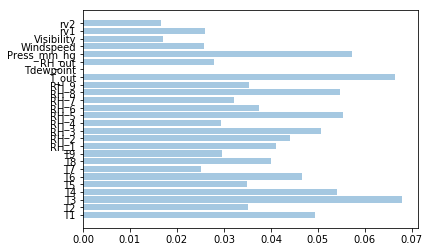

In [43]:
y_list = gbrt.feature_importances_
y_pos = np.arange(len(y_list))
features = x.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

We can see from Feature Importance plot that except "Tdewpoint" all the columns are quite significant

# PCA

1. Apply PCA on X_train
2. Apply all the models in project 1 again on data you get from PCA

In [44]:
pca = PCA(n_components=0.97)
x_reduced = pca.fit_transform(x_train_scaled)
x_reduced_test= pca.fit_transform(x_test_scaled)

In [45]:
pca.n_components_

14

Plot PCA chart

In [46]:
pca1 = PCA()
pca1.fit(x_train_scaled)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.97) + 1
d

14

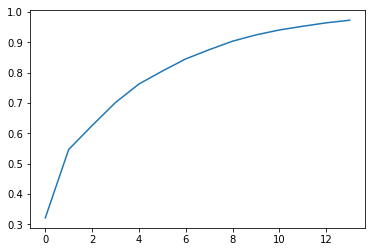

In [47]:
plt.plot(cumsum)

In [48]:
x_reduced= pd.DataFrame(x_reduced)
x_reduced.head(5)

0         1         2         3         4         5         6   \
0  2.748756  4.018345  1.450615 -0.218930 -2.253888 -0.380939  0.229417   
1  2.361526 -2.520978  1.457135  0.560569 -1.187153  0.215204  0.908200   
2 -2.866869  1.605272 -1.287653 -0.318511 -0.826816 -0.882534 -1.427819   
3 -5.508070  0.767002  0.421049  0.595536  1.016770  0.711267  1.320491   
4  2.811555  4.580254 -1.738595  1.131230  1.606053  1.787564 -0.212602   

         7         8         9         10        11        12        13  
0  1.372024 -1.095455 -1.060487 -0.563312  0.276013 -0.746676 -0.934614  
1  1.799077  1.910272 -0.745783 -0.151363 -0.368035 -0.436928  0.729325  
2  0.180946  0.090797 -0.476504  0.460415  0.381863  0.113804 -0.149473  
3 -0.509896  0.471786 -0.647520  0.357315  1.328488  0.404441 -0.459486  
4  0.454866  0.463421 -0.223041  1.338032  0.633447 -0.727347  0.069456

In [49]:
lreg= LinearRegression()
lreg.fit(x_reduced, y_train)
print(f'Train score for Linear regression model without using Kfold validation is: {lreg.score(x_reduced, y_train)}')

train_scores= cross_val_score(lreg,x_reduced,y_train, cv=10)
print(f'Train score for Linear regression model using 10Fold cross validation is:  {train_scores.mean()}')
test_scores= cross_val_score(lreg,x_reduced_test,y_test, cv=10)
print(f'Test score for Linear regression model using 10Fold cross validation is:  {test_scores.mean()}')

mse= cross_val_score(lreg, x_reduced, y_train, scoring="neg_mean_squared_error", cv=10)
print(f'RMSE for Linear regression model using 10Fold cross validation is: {mse.mean()}')


Train score for Linear regression model without using Kfold validation is: 0.10471546963921918
Train score for Linear regression model using 10Fold cross validation is:  0.06337894081323114
Test score for Linear regression model using 10Fold cross validation is:  -0.03906665764180617
RMSE for Linear regression model using 10Fold cross validation is: -16102.697919651753


In [50]:
compiled=compiled.append({'Regressor': 'LinearRegression', 'Avg_Train_Score': train_scores.mean(), 
                          'Avg_Test_Score': test_scores.mean(), 'RMSE_Best_Param': mse.mean(), 
                          'Best_Hyperparameters': "N/A"}, ignore_index=True)

# Improved Linear Regression

# 1. Ridge 

Best parameter for ridge regression is: {'alpha': 60}
Average training score for ridge regression model using 10Fold CV is: 0.10477963668574734
Average testing score for ridge regression model using 10Fold CV is: 0.06553450892386913


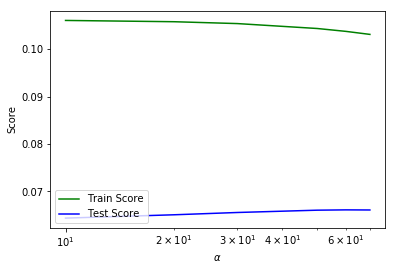

In [51]:
ridge= Ridge()
param= {'alpha':[ 10,20,30,50,60,70]}
ridge_regressor= GridSearchCV(ridge, param, cv=10, return_train_score= True)
ridge_regressor.fit(x_reduced, y_train)

ridge_train_score_list= ridge_regressor.cv_results_["mean_train_score"]
ridge_test_score_list= ridge_regressor.cv_results_["mean_test_score"]

#visualize the result:plots
x_range= [ 10, 20, 30, 50, 60, 70]
plt.plot(x_range, ridge_train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, ridge_test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')

print(f'Best parameter for ridge regression is: {ridge_regressor.best_params_}')
print(f'Average training score for ridge regression model using 10Fold CV is: {((ridge_regressor.cv_results_["mean_train_score"]).sum())/len(x_range)}')
print(f'Average testing score for ridge regression model using 10Fold CV is: {((ridge_regressor.cv_results_["mean_test_score"]).sum())/len(x_range)}')
      

In [52]:
#Implementing the final model with the best param with Root mean squared error(RMSE) as the scoring metrics
ridge_final= Ridge(alpha=60)
ridge_final.fit(x_reduced, y_train)
ridge_final_train_scores= cross_val_score(ridge_final,x_reduced, y_train, cv=10, scoring= 'neg_mean_squared_error')
ridge_final_test_scores= cross_val_score(ridge_final,x_reduced_test, y_test, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Ridge regression model using 10 Fold CV is: {ridge_final_train_scores.mean()}')
print(f'Test  RMSE for best Ridge regression model using 10 Fold CV is: {ridge_final_test_scores.mean()}')

Train RMSE for best Ridge regression model using 10 Fold CV is: -16082.678424528538
Test  RMSE for best Ridge regression model using 10 Fold CV is: -19141.781515894116


In [53]:
compiled=compiled.append({'Regressor': 'Ridge_Regression', 
                          'Avg_Train_Score': ((ridge_regressor.cv_results_["mean_train_score"]).sum())/len(x_range), 
                          'Avg_Test_Score': ((ridge_regressor.cv_results_["mean_test_score"]).sum())/len(x_range), 
                          'RMSE_Best_Param': ridge_final_test_scores.mean(),
                          'Best_Hyperparameters': ridge_regressor.best_params_}, ignore_index=True)

# 2. Lasso

Best parameter for Lasso regression is: {'alpha': 1}
Average training score for Lasso regression model using 10Fold CV is: 0.10210598244649681
Average testing score for Lasso regression model using 10Fold CV is: 0.061507153769950584


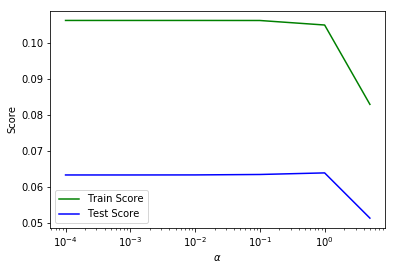

In [54]:
#Lasso regression
lasso= Lasso()
param= {'alpha':[0.0001, 0.001, 0.01, 0.1, 1,5]}
lasso_regressor= GridSearchCV(lasso, param, cv=10, return_train_score= True)
lasso_regressor.fit(x_reduced, y_train)

lasso_test_score_list= lasso_regressor.cv_results_["mean_test_score"]
lasso_train_score_list= lasso_regressor.cv_results_["mean_train_score"]

#visualize the result:plots
x_range= [0.0001, 0.001, 0.01, 0.1, 1,5]
plt.plot(x_range, lasso_train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, lasso_test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')


print(f'Best parameter for Lasso regression is: {lasso_regressor.best_params_}')
print(f'Average training score for Lasso regression model using 10Fold CV is: {((lasso_regressor.cv_results_["mean_train_score"]).sum())/len(x_range)}')
print(f'Average testing score for Lasso regression model using 10Fold CV is: {((lasso_regressor.cv_results_["mean_test_score"]).sum())/len(x_range)}')
      

In [55]:
#Implementing the final model with the best param with Root mean squared error(RMSE) as the scoring metrics
lasso_final= Lasso(alpha= 1)
lasso_final.fit(x_reduced, y_train)
lasso_final_train_scores= cross_val_score(lasso_final,x_reduced, y_train, cv=10, scoring= 'neg_mean_squared_error')
lasso_final_test_scores= cross_val_score(lasso_final,x_reduced_test, y_test, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Lasso regression model using 10 Fold CV is: {lasso_final_train_scores.mean()}')
print(f'Test  RMSE for best Lasso regression model using 10 Fold CV is: {lasso_final_test_scores.mean()}')

Train RMSE for best Lasso regression model using 10 Fold CV is: -16106.952484994705
Test  RMSE for best Lasso regression model using 10 Fold CV is: -19292.905285756435


In [56]:
compiled=compiled.append({'Regressor': 'Lasso_Regression',
                          'Avg_Train_Score': ((lasso_regressor.cv_results_["mean_train_score"]).sum())/len(x_range), 
                          'Avg_Test_Score': ((lasso_regressor.cv_results_["mean_test_score"]).sum())/len(x_range),
                          'RMSE_Best_Param': lasso_final_test_scores.mean(), 'Best_Hyperparameters': lasso_regressor.best_params_}, ignore_index=True)

# 3. Polynomial

In [57]:
lreg2= LinearRegression()
train_score_list = []
test_score_list = []

#Use maxiter as a param
for n in [1,2,3]:
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(x_reduced)
    lreg2.fit(X_train_poly, y_train)
    train_scores= cross_val_score(lreg2,X_train_poly,y_train, cv=10)
    test_scores= cross_val_score(lreg2,x_reduced_test,y_test, cv=10)
    train_score_list.append(train_scores)
    test_score_list.append(test_scores)

In [58]:
poly_train_score_list1=[]
poly_test_score_list1=[]

for i in [0,1,2]:
    poly_train_score_list= train_score_list[i].sum()/len(train_score_list[i])
    poly_train_score_list1.append(poly_train_score_list)
    poly_test_score_list= test_score_list[i].sum()/len(test_score_list[i])
    poly_test_score_list1.append(poly_test_score_list)
    

In [59]:
print('Best score comes from Degree 2')
print(f'Average Train score across different params is: {poly_train_score_list1}')    
print(f'Average Test score across different params is: {poly_test_score_list1}')    


Best score comes from Degree 2
Average Train score across different params is: [0.06337894081323105, 0.25836227029653425, -29.318482007416513]
Average Test score across different params is: [-0.03906665764180617, -0.03906665764180617, -0.03906665764180617]


Text(0,0.5,'Score')

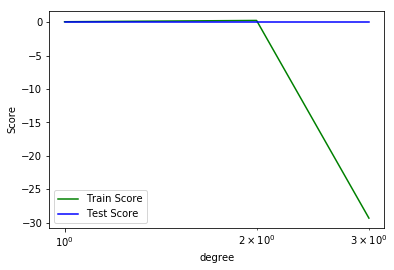

In [60]:
x_range= [1,2,3]
plt.plot(x_range, poly_train_score_list1, c = 'g', label = 'Train Score')
plt.plot(x_range, poly_test_score_list1, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'degree')
plt.ylabel('Score')

In [61]:
poly_final= PolynomialFeatures(degree=2)
x_train_poly_final= poly_final.fit_transform(x_reduced)
poly_final.fit(x_train_poly_final, y_train)
lreg2.fit(x_train_poly_final, y_train)

poly_final_train_scores= cross_val_score(lreg2, x_train_poly_final, y_train, cv=10, scoring= 'neg_mean_squared_error')
poly_final_test_scores= cross_val_score(lreg2, x_test, y_test, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Poly regression model using 10 Fold CV is: {poly_final_train_scores.mean()}')
print(f'Test  RMSE for best Poly regression model using 10 Fold CV is: {poly_final_test_scores.mean()}')

Train RMSE for best Poly regression model using 10 Fold CV is: -12916.064211302686
Test  RMSE for best Poly regression model using 10 Fold CV is: -18524.50207066597


In [62]:
def list_sum(s):
    add=0
    for i in s:
        add= add+i
    return add

                
Avg_train_score= list_sum(poly_train_score_list1)/len(poly_train_score_list1)   
Avg_Test_Score= list_sum(poly_test_score_list1)/len(poly_test_score_list1)

In [63]:
compiled=compiled.append({'Regressor': 'Polynomial_Regression', 'Avg_Train_Score': Avg_train_score, 
                          'Avg_Test_Score': Avg_Test_Score, 'RMSE_Best_Param': poly_final_test_scores.mean(), 
                          'Best_Hyperparameters': 'Degree:2'}, ignore_index=True)

# Support Vector Regression

1. Simple Linear SVM

Best parameter for Linear SVM regression is: {'C': 200}
Average training score for Linear SVM regression model using 10Fold CV is: -0.10307842379122145
Average testing score for Linear SVM regression model using 10Fold CV is: -0.10887781026748292


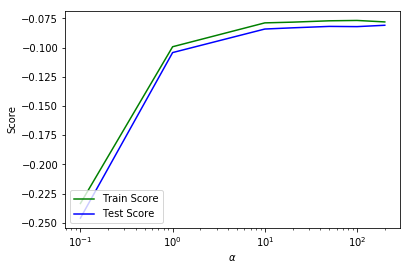

In [64]:
param_grid = {'C': [ 0.1, 1, 10, 20, 50, 100, 200] }
svm_model = LinearSVR()
linearSVM_regressor= GridSearchCV(svm_model, param_grid, cv=10, return_train_score= True)
linearSVM_regressor.fit(x_reduced, (y_train.values).reshape(len(y_train),))
linearSVM_regressor.score(x_reduced, (y_train.values).reshape(len(y_train),))
linearSVM_regressor_train_score_list= linearSVM_regressor.cv_results_["mean_train_score"]
linearSVM_regressor_test_score_list= linearSVM_regressor.cv_results_["mean_test_score"]

x_range=  [ 0.1, 1, 10, 20, 50, 100, 200]
plt.plot(x_range, linearSVM_regressor_train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, linearSVM_regressor_test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')

print(f'Best parameter for Linear SVM regression is: {linearSVM_regressor.best_params_}')
print(f'Average training score for Linear SVM regression model using 10Fold CV is: {((linearSVM_regressor.cv_results_["mean_train_score"]).sum())/len(x_range)}')
print(f'Average testing score for Linear SVM regression model using 10Fold CV is: {((linearSVM_regressor.cv_results_["mean_test_score"]).sum())/len(x_range)}')
      

In [65]:
#Implementing Linear SVM regression model using the best found parameters
linearSVM_final= LinearSVR(C= 100)
linearSVM_final.fit(x_reduced, ((y_train.values).reshape(len(y_train),)))
linearSVM_final_final_train_score= cross_val_score(linearSVM_final,x_reduced, (y_train.values).reshape(len(y_train),), cv=10, scoring= 'neg_mean_squared_error')
linearSVM_final_final_test_score= cross_val_score(linearSVM_final,x_test, y_test, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Simple linearSVM regression model using 10 Fold CV is: {linearSVM_final_final_train_score.mean()}')
print(f'Test RMSE for best Simple linearSVM regression model using 10 Fold CV is: {linearSVM_final_final_test_score.mean()}')


Train RMSE for best Simple linearSVM regression model using 10 Fold CV is: -18805.433942082716
Test RMSE for best Simple linearSVM regression model using 10 Fold CV is: -22504.793169344008


In [66]:
compiled=compiled.append({'Regressor': 'linear_SVMRegression',
                          'Avg_Train_Score': ((linearSVM_regressor.cv_results_["mean_train_score"]).sum())/len(linearSVM_regressor_train_score_list), 
                          'Avg_Test_Score': ((linearSVM_regressor.cv_results_["mean_test_score"]).sum())/len(linearSVM_regressor_test_score_list),
                          'RMSE_Best_Param': linearSVM_final_final_train_score.mean(),
                          'Best_Hyperparameters': linearSVM_regressor.best_params_}, ignore_index=True)

2. Kernalized SVM Regression

In [67]:
#Creating hyperparameters for Grid Search
parameters = [{'C':[ 0.1,1,3], 'kernel':['rbf','linear','poly'], 'gamma':[0.01,1]}]

SVM_regressor = GridSearchCV(estimator = SVR(), scoring= 'neg_mean_squared_error', param_grid = parameters, cv=5, n_jobs = -1)

SVM_regressor.fit(x_reduced,y_train)

SVM_regressor.score(x_reduced_test, y_test)

SVM_regressor_train_score_list= SVM_regressor.cv_results_["mean_train_score"]
SVM_regressor_test_score_list= SVM_regressor.cv_results_["mean_test_score"]


In [68]:
print(f'Best parameter for SVM regression is: {SVM_regressor.best_params_}')
print(f'Average training score for SVM regression model using 10Fold CV is: {(SVM_regressor_train_score_list.sum())/len(SVM_regressor_train_score_list)}')
print(f'Average testing score for SVM regression model using 10Fold CV is: {(SVM_regressor_test_score_list.sum())/len(SVM_regressor_test_score_list)}')

Best parameter for SVM regression is: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Average training score for SVM regression model using 10Fold CV is: -17613.145819238518
Average testing score for SVM regression model using 10Fold CV is: -19129.78952840155


In [69]:
#Implementing SVM Regressor model with the best estimator found from above analysis
svm_final= SVR(C=0.1 , gamma= 1 , kernel='poly')
svm_final.fit(x_reduced,y_train)
svm_final_train_scores=cross_val_score(svm_final,x_reduced, y_train, cv=5, scoring= 'neg_mean_squared_error')
svm_final_test_scores=cross_val_score(svm_final,x_reduced_test, y_test, cv=5, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best SVM regression model using 10 Fold CV is: {svm_final_train_scores.mean()}')
print(f'Test  RMSE for best SVM regression model using 10 Fold CV is: {svm_final_test_scores.mean()}')

compiled=compiled.append({'Regressor': 'Kernel_SVMRegression',
                          'Avg_Train_Score': (SVM_regressor_train_score_list.sum())/len(SVM_regressor_train_score_list), 
                          'Avg_Test_Score':  (SVM_regressor_test_score_list.sum())/len(SVM_regressor_test_score_list),
                          'RMSE_Best_Param': lasso_final_test_scores.mean(),
                          'Best_Hyperparameters': SVM_regressor.best_params_}, ignore_index=True)

Train RMSE for best SVM regression model using 10 Fold CV is: -12605.731774627762
Test  RMSE for best SVM regression model using 10 Fold CV is: -21985.169456247346


# KNN Regressor

In [70]:
knn= KNeighborsRegressor()
param= {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'] }
knn_regressor= GridSearchCV(knn, param, cv=10, return_train_score= True)
knn_regressor.fit(x_reduced, y_train)
knn_regressor.score(x_reduced_test, y_test)
knn_regressor_train_score_list= knn_regressor.cv_results_["mean_train_score"]
knn_regressor_test_score_list= knn_regressor.cv_results_["mean_test_score"]
print(f'Best parameter for KNN regression is: {knn_regressor.best_params_}')
print(f'Average training score for KNN regression model using 10Fold CV is: {(knn_regressor_train_score_list.sum())/len(knn_regressor_train_score_list)}')
print(f'Average testing score for KNN regression model using 10Fold CV is: {(knn_regressor_test_score_list.sum())/len(knn_regressor_test_score_list)}')

#Implementing KNN Regressor model with the best estimator found from above analysis
KNN_final= KNeighborsRegressor(algorithm= 'auto', n_neighbors= 5, weights='distance')
KNN_final.fit(x_reduced, y_train)
KNN_final_train_scores=cross_val_score(KNN_final,x_reduced, y_train, cv=10, scoring= 'neg_mean_squared_error')
KNN_final_test_scores=cross_val_score(KNN_final,x_reduced_test, y_test, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best KNN regression model using 10 Fold CV is: {KNN_final_train_scores.mean()}')
print(f'Test  RMSE for best KNN regression model using 10 Fold CV is: {KNN_final_test_scores.mean()}')


Best parameter for KNN regression is: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Average training score for KNN regression model using 10Fold CV is: 0.798782291632337
Average testing score for KNN regression model using 10Fold CV is: 0.28662743363717536
Train RMSE for best KNN regression model using 10 Fold CV is: -10930.20384913636
Test  RMSE for best KNN regression model using 10 Fold CV is: -16213.97313944695


In [71]:
compiled=compiled.append({'Regressor': 'KNN_Regression',
                          'Avg_Train_Score': (knn_regressor_train_score_list.sum())/len(knn_regressor_train_score_list), 
                          'Avg_Test_Score':  (knn_regressor_test_score_list.sum())/len(knn_regressor_test_score_list),
                          'RMSE_Best_Param': KNN_final_test_scores.mean(),
                          'Best_Hyperparameters': knn_regressor.best_params_}, ignore_index=True)

# Decision Tree Regressor

In [72]:
tree = DecisionTreeRegressor()
param_grid = [{'splitter': ['best', 'random'], 'max_depth': np.arange(5,15), 'max_features':[4,5,8,10]}]

tree_regressor= GridSearchCV(tree, param_grid, cv=5, return_train_score= True)

tree_regressor.fit(x_reduced, y_train)
tree_regressor.score(x_reduced_test, y_test)

tree_test_score_list= tree_regressor.cv_results_["mean_test_score"]
tree_train_score_list= tree_regressor.cv_results_["mean_train_score"]

print(f'Best parameter for Decision tree regression is: {tree_regressor.best_params_}')
print(f'Average training score for KNN regression model using 10Fold CV is: {(tree_train_score_list.sum())/len(tree_train_score_list)}')
print(f'Average testing score for KNN regression model using 10Fold CV is: {(tree_test_score_list.sum())/len(tree_test_score_list)}')


Best parameter for Decision tree regression is: {'max_depth': 7, 'max_features': 8, 'splitter': 'random'}
Average training score for KNN regression model using 10Fold CV is: 0.6868032745455774
Average testing score for KNN regression model using 10Fold CV is: -0.1427106658649659


In [73]:
#Implementing Decision Tree Regressor model with the best estimator found from above analysis
tree_final= DecisionTreeRegressor(max_depth=5, max_features=4, splitter= 'random')
tree_final.fit(x_reduced, y_train)
tree_final_train_scores=cross_val_score(tree_final,x_reduced, y_train, cv=10, scoring= 'neg_mean_squared_error')
tree_final_test_scores=cross_val_score(tree_final,x_reduced_test, y_test, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Decision Tree regression model using 10 Fold CV is: {tree_final_train_scores.mean()}')
print(f'Test  RMSE for best Decision Tree regression model using 10 Fold CV is: {tree_final_test_scores.mean()}')

compiled=compiled.append({'Regressor': 'Decision_Tree_Regression',
                          'Avg_Train_Score': (tree_train_score_list.sum())/len(tree_train_score_list), 
                          'Avg_Test_Score':  (tree_test_score_list.sum())/len(tree_test_score_list),
                          'RMSE_Best_Param': tree_final_test_scores.mean(),
                          'Best_Hyperparameters': tree_regressor.best_params_}, ignore_index=True)

Train RMSE for best Decision Tree regression model using 10 Fold CV is: -17010.760301152906
Test  RMSE for best Decision Tree regression model using 10 Fold CV is: -21495.237527850397


# Comparing all the models with and without PCA

In [74]:
compiled

Regressor  Avg_Train_Score  Avg_Test_Score  RMSE_Best_Param  \
0          LinearRegression         0.063379       -0.039067    -16102.697920   
1          Ridge_Regression         0.104780        0.065535    -19141.781516   
2          Lasso_Regression         0.102106        0.061507    -19292.905286   
3     Polynomial_Regression        -9.665580       -0.039067    -18524.502071   
4      linear_SVMRegression        -0.103078       -0.108878    -18805.433942   
5      Kernel_SVMRegression    -17613.145819   -19129.789528    -19292.905286   
6            KNN_Regression         0.798782        0.286627    -16213.973139   
7  Decision_Tree_Regression         0.686803       -0.142711    -21495.237528   

                                Best_Hyperparameters  
0                                                N/A  
1                                      {'alpha': 60}  
2                                       {'alpha': 1}  
3                                           Degree:2  
4                                         {'C': 200}  
5           {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}  
6  {'algorithm': 'auto', 'n_neighbors': 5, 'weigh...  
7  {'max_depth': 7, 'max_features': 8, 'splitter'...

In [75]:
compiled_without_PCA= pd.read_csv(r'C:\Users\nayak\Desktop\Study resource\4th sem\ML\Project 2\abhijeet\compiled.csv', index_col='Sno.')

In [76]:
compiled_without_PCA

Regressor  Avg_Train_Score  Avg_Test_Score  \
Sno.                                                              
0             LinearRegression         0.136454        0.025437   
1             Ridge_Regression         0.216887        0.141268   
2             Lasso_Regression         0.203513        0.125541   
3        Polynomial_Regression        -1.128313        0.025437   
4         linear_SVMRegression        -0.034923       -0.047730   
5         Kernel_SVMRegression    -19474.132730   -19581.252450   
6               KNN_Regression         0.808205        0.322192   
7     Decision_Tree_Regression         0.696112        0.111863   

      RMSE_Best_Param                               Best_Hyperparameters  
Sno.                                                                      
0        -14773.42357                                                NaN  
1        -17989.59565                                      {'alpha': 20}  
2        -18405.34843                                     {'alpha': 0.1}  
3        -18524.50207                                           Degree:2  
4        -17410.70633                                         {'C': 100}  
5        -18405.34843           {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}  
6        -16149.00031  {'algorithm': 'brute', 'n_neighbors': 5, 'weig...  
7        -28550.98300  {'max_depth': 11, 'max_features': 4, 'splitter...

Comparing both the different tables we can see that "All most all the model without PCA have a slight better score than with PCA". It make sense as the number of feautures in the original dataset is not very high, so the problem that arises due to high dimensions is not very significant in this case. 

# Deep Learning Models:

On the reduced Dataset after applying PCA

### 1. Designing a single layer perceptron (input & output layer; no hidden layer) & tuning hyperparameters

In [77]:
import keras
import tensorflow as tf 
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.losses import sparse_categorical_crossentropy
from keras.activations import relu, softmax
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import LeakyReLU
from keras.regularizers import l2
from keras.regularizers import l1
from keras.regularizers import l1_l2

Using TensorFlow backend.


In [78]:
def create_model1 (dropout_rate=0.0):
	# create model
    model2 = Sequential()
    model2.add(Dense(14, input_dim=14, kernel_initializer="uniform"))
    model2.add(LeakyReLU(alpha=0.02))
    model2.add(Dense(1, kernel_initializer="uniform", activation='linear'))
    # Compile model
    model2.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model2
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

X = x_reduced
Y = y_train
# create model
model2 = KerasRegressor(build_fn=create_model1, verbose=2)
# define the grid search parameters
batch_size = [20, 32, 62]
epochs = [50,100,200]
dropout_rate = [ 0.2, 0.3, 0.5 ]

In [ ]:
#Grid_Search
param_grid = dict(batch_size=batch_size, epochs=epochs, dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1,cv=5)
grid_result = grid.fit(X, Y, validation_data=(x_reduced_test,y_test))

In [79]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
model1 = Sequential()
model1.add(Dense(14, input_dim=14, kernel_initializer="RandomNormal", activation='relu'))
model1.add(Dense(1, kernel_initializer="RandomNormal", activation='linear'))
# Compile model
model1.compile(loss='mse', optimizer='adam', metrics=['mse'])
X = x_reduced
Y = y_train

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

NN= model1.fit(X,Y, epochs= 200, batch_size= 64, validation_data=(x_reduced_test,y_test),callbacks=[reduce_lr])

Train on 900 samples, validate on 300 samples
Epoch 1/200
900/900 [==============================] - 0s 332us/step - loss: 30056.6042 - mean_squared_error: 30056.6042 - val_loss: 34015.9854 - val_mean_squared_error: 34015.9854
Epoch 2/200
900/900 [==============================] - 0s 17us/step - loss: 30044.1632 - mean_squared_error: 30044.1632 - val_loss: 34003.0566 - val_mean_squared_error: 34003.0566
Epoch 3/200
900/900 [==============================] - 0s 14us/step - loss: 30030.4570 - mean_squared_error: 30030.4570 - val_loss: 33987.5856 - val_mean_squared_error: 33987.5856
Epoch 4/200
900/900 [==============================] - 0s 13us/step - loss: 30013.5550 - mean_squared_error: 30013.5550 - val_loss: 33969.1316 - val_mean_squared_error: 33969.1316
Epoch 5/200
900/900 [==============================] - 0s 18us/step - loss: 29992.6264 - mean_squared_error: 29992.6264 - val_loss: 33946.4162 - val_mean_squared_error: 33946.4162
Epoch 6/200
900/900 [==============================] 

900/900 [==============================] - 0s 13us/step - loss: 24507.5822 - mean_squared_error: 24507.5822 - val_loss: 28937.8609 - val_mean_squared_error: 28937.8609
Epoch 47/200
900/900 [==============================] - 0s 13us/step - loss: 24316.6340 - mean_squared_error: 24316.6340 - val_loss: 28773.2204 - val_mean_squared_error: 28773.2204
Epoch 48/200
900/900 [==============================] - 0s 18us/step - loss: 24130.3050 - mean_squared_error: 24130.3050 - val_loss: 28608.7252 - val_mean_squared_error: 28608.7252
Epoch 49/200
900/900 [==============================] - 0s 17us/step - loss: 23944.4165 - mean_squared_error: 23944.4165 - val_loss: 28438.7493 - val_mean_squared_error: 28438.7493
Epoch 50/200
900/900 [==============================] - 0s 13us/step - loss: 23743.9943 - mean_squared_error: 23743.9943 - val_loss: 28261.6528 - val_mean_squared_error: 28261.6528
Epoch 51/200
900/900 [==============================] - 0s 16us/step - loss: 23551.7903 - mean_squared_error

Epoch 91/200
900/900 [==============================] - 0s 14us/step - loss: 17944.7170 - mean_squared_error: 17944.7170 - val_loss: 23546.2048 - val_mean_squared_error: 23546.2048
Epoch 92/200
900/900 [==============================] - 0s 14us/step - loss: 17871.9689 - mean_squared_error: 17871.9689 - val_loss: 23485.2497 - val_mean_squared_error: 23485.2497
Epoch 93/200
900/900 [==============================] - 0s 12us/step - loss: 17799.9848 - mean_squared_error: 17799.9848 - val_loss: 23419.3819 - val_mean_squared_error: 23419.3819
Epoch 94/200
900/900 [==============================] - 0s 13us/step - loss: 17730.5004 - mean_squared_error: 17730.5004 - val_loss: 23361.8567 - val_mean_squared_error: 23361.8567
Epoch 95/200
900/900 [==============================] - 0s 12us/step - loss: 17666.6672 - mean_squared_error: 17666.6672 - val_loss: 23305.6376 - val_mean_squared_error: 23305.6376
Epoch 96/200
900/900 [==============================] - 0s 13us/step - loss: 17601.3742 - mean_

900/900 [==============================] - 0s 16us/step - loss: 15992.1280 - mean_squared_error: 15992.1280 - val_loss: 21943.8897 - val_mean_squared_error: 21943.8897
Epoch 137/200
900/900 [==============================] - 0s 19us/step - loss: 15973.0118 - mean_squared_error: 15973.0118 - val_loss: 21919.9554 - val_mean_squared_error: 21919.9554
Epoch 138/200
900/900 [==============================] - 0s 18us/step - loss: 15950.5932 - mean_squared_error: 15950.5932 - val_loss: 21887.8712 - val_mean_squared_error: 21887.8712
Epoch 139/200
900/900 [==============================] - 0s 17us/step - loss: 15931.8088 - mean_squared_error: 15931.8088 - val_loss: 21870.0638 - val_mean_squared_error: 21870.0638
Epoch 140/200
900/900 [==============================] - 0s 18us/step - loss: 15913.0783 - mean_squared_error: 15913.0783 - val_loss: 21846.7545 - val_mean_squared_error: 21846.7545
Epoch 141/200
900/900 [==============================] - 0s 13us/step - loss: 15889.0458 - mean_squared_

In [80]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model1.predict(x_reduced)
y_test_predict = model1.predict(x_reduced_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.12
Test score: -0.05


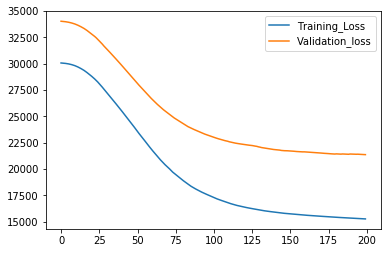

In [81]:
#Plot to show how the validation training and testing loss 
plt.plot(NN.history['loss'], label= 'Training_Loss')
plt.plot(NN.history['val_loss'], label= 'Validation_loss')
plt.legend()
plt.show()

I tried running grid search with minimal parameters and kept it running for one whole night but still it ended up as "processing". So finally I had to use trial and error method to find best combination of parameter.

### 1. Designing a Multi layer perceptron (input & output layer; no hidden layer) & tuning hyperparameters

In [82]:

def create_model (dropout_rate=0.0):
	# create model
    model = Sequential()
    model.add(Dense(14, input_dim=14, kernel_initializer="uniform"))
    model.add(LeakyReLU(alpha=0.02))
    model.add(Dense(10, kernel_initializer="uniform"))
    model.add(LeakyReLU(alpha=0.02))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, kernel_initializer="uniform", activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer="uniform", activation='linear'))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

X = x_reduced
Y = y_train
# create model
model = KerasRegressor(build_fn=create_model, verbose=2)
# define the grid search parameters
batch_size = [20, 32, 62]
epochs = [50,100,150,200]
dropout_rate = [ 0.2, 0.3, 0.5 ]
#neurons = [ 5, 10]

In [ ]:
#Grid_Search
param_grid = dict(batch_size=batch_size, epochs=epochs, dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,cv=5)
grid_result = grid.fit(X, Y, validation_data=(x_reduced_test,y_test))

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


I tried running grid search with minimal parameters and kept it running for one whole night but still it ended up as "processing". So finally I had to use trial and error method to find best combination of parameter.

In [83]:
#Trial Neural Network model
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
model1 = Sequential()
model1.add(Dense(14, input_dim=14, kernel_initializer="RandomNormal", activation='relu'))
model1.add(Dense(10, kernel_initializer="RandomNormal"))
model1.add(LeakyReLU(alpha=0.3))
model1.add(Dropout(0.3))
model1.add(Dense(10, kernel_initializer="RandomNormal"))
model1.add(LeakyReLU(alpha=0.3))
model1.add(Dropout(0.3))
model1.add(Dense(10, kernel_initializer="RandomNormal"))
model1.add(LeakyReLU(alpha=0.3))
model1.add(Dropout(0.3))
model1.add(Dense(1, kernel_initializer="RandomNormal", activation='linear'))
# Compile model
model1.compile(loss='mse', optimizer='adam', metrics=['mse'])
X = x_reduced
Y = y_train

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

NN= model1.fit(X,Y, epochs= 200, batch_size= 64, validation_data=(x_reduced_test,y_test),callbacks=[reduce_lr])

Train on 900 samples, validate on 300 samples
Epoch 1/200
900/900 [==============================] - 0s 512us/step - loss: 30059.1915 - mean_squared_error: 30059.1915 - val_loss: 34022.0895 - val_mean_squared_error: 34022.0895
Epoch 2/200
900/900 [==============================] - 0s 23us/step - loss: 30053.6330 - mean_squared_error: 30053.6330 - val_loss: 34015.1808 - val_mean_squared_error: 34015.1808
Epoch 3/200
900/900 [==============================] - 0s 21us/step - loss: 30045.3773 - mean_squared_error: 30045.3773 - val_loss: 34002.8569 - val_mean_squared_error: 34002.8569
Epoch 4/200
900/900 [==============================] - 0s 27us/step - loss: 30027.1457 - mean_squared_error: 30027.1457 - val_loss: 33975.8155 - val_mean_squared_error: 33975.8155
Epoch 5/200
900/900 [==============================] - 0s 27us/step - loss: 29986.1979 - mean_squared_error: 29986.1979 - val_loss: 33911.1934 - val_mean_squared_error: 33911.1934
Epoch 6/200
900/900 [==============================] 

900/900 [==============================] - 0s 24us/step - loss: 17178.2028 - mean_squared_error: 17178.2028 - val_loss: 21615.3232 - val_mean_squared_error: 21615.3232
Epoch 47/200
900/900 [==============================] - 0s 24us/step - loss: 16531.4237 - mean_squared_error: 16531.4237 - val_loss: 21598.5583 - val_mean_squared_error: 21598.5583
Epoch 48/200
900/900 [==============================] - 0s 22us/step - loss: 17434.3582 - mean_squared_error: 17434.3582 - val_loss: 21603.1260 - val_mean_squared_error: 21603.1260
Epoch 49/200
900/900 [==============================] - 0s 23us/step - loss: 16937.6968 - mean_squared_error: 16937.6968 - val_loss: 21593.2896 - val_mean_squared_error: 21593.2896
Epoch 50/200
900/900 [==============================] - 0s 22us/step - loss: 16886.2108 - mean_squared_error: 16886.2108 - val_loss: 21659.7082 - val_mean_squared_error: 21659.7082
Epoch 51/200
900/900 [==============================] - 0s 24us/step - loss: 16246.7993 - mean_squared_error

900/900 [==============================] - 0s 23us/step - loss: 16425.4531 - mean_squared_error: 16425.4531 - val_loss: 21244.1756 - val_mean_squared_error: 21244.1756
Epoch 92/200
900/900 [==============================] - 0s 20us/step - loss: 15695.3982 - mean_squared_error: 15695.3982 - val_loss: 21227.7713 - val_mean_squared_error: 21227.7713
Epoch 93/200
900/900 [==============================] - 0s 20us/step - loss: 15762.6635 - mean_squared_error: 15762.6635 - val_loss: 21207.7497 - val_mean_squared_error: 21207.7497
Epoch 94/200
900/900 [==============================] - 0s 20us/step - loss: 15579.3074 - mean_squared_error: 15579.3074 - val_loss: 21156.7119 - val_mean_squared_error: 21156.7119
Epoch 95/200
900/900 [==============================] - 0s 21us/step - loss: 15511.4728 - mean_squared_error: 15511.4728 - val_loss: 21130.4464 - val_mean_squared_error: 21130.4464
Epoch 96/200
900/900 [==============================] - 0s 24us/step - loss: 15995.7691 - mean_squared_error

900/900 [==============================] - 0s 30us/step - loss: 15471.4836 - mean_squared_error: 15471.4836 - val_loss: 20579.3000 - val_mean_squared_error: 20579.3000
Epoch 182/200
900/900 [==============================] - 0s 23us/step - loss: 15554.6979 - mean_squared_error: 15554.6979 - val_loss: 20554.2019 - val_mean_squared_error: 20554.2019
Epoch 183/200
900/900 [==============================] - 0s 32us/step - loss: 14295.3743 - mean_squared_error: 14295.3743 - val_loss: 20507.7983 - val_mean_squared_error: 20507.7983
Epoch 184/200
900/900 [==============================] - 0s 29us/step - loss: 14714.0660 - mean_squared_error: 14714.0660 - val_loss: 20489.8906 - val_mean_squared_error: 20489.8906
Epoch 185/200
900/900 [==============================] - 0s 22us/step - loss: 15513.9697 - mean_squared_error: 15513.9697 - val_loss: 20516.7971 - val_mean_squared_error: 20516.7971
Epoch 186/200
900/900 [==============================] - 0s 23us/step - loss: 15225.5185 - mean_squared_

In [84]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model1.predict(x_reduced)
y_test_predict = model1.predict(x_reduced_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.23
Test score: -0.01


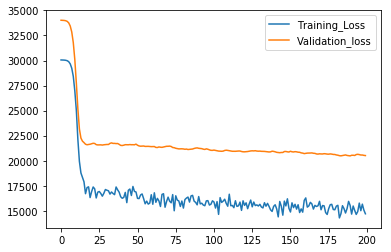

In [85]:
#Plot to show how the validation training and testing loss 
plt.plot(NN.history['loss'], label= 'Training_Loss')
plt.plot(NN.history['val_loss'], label= 'Validation_loss')
plt.legend()
plt.show()

# In our Neural Networks are not performing as well as we would expect them to be but we can see that Multi Layer Neural Network perform better than Single layer neural network